In [27]:
#Question 1
import pandas as pd
# Load the CSV file into a DataFrame
file_path = 'C:/Users/Amin/Desktop/Data science project/police_project.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested stop_duration  drugs_related_stop  
0         NaN       Citation       False      0-15 

In [28]:
#Question 1
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

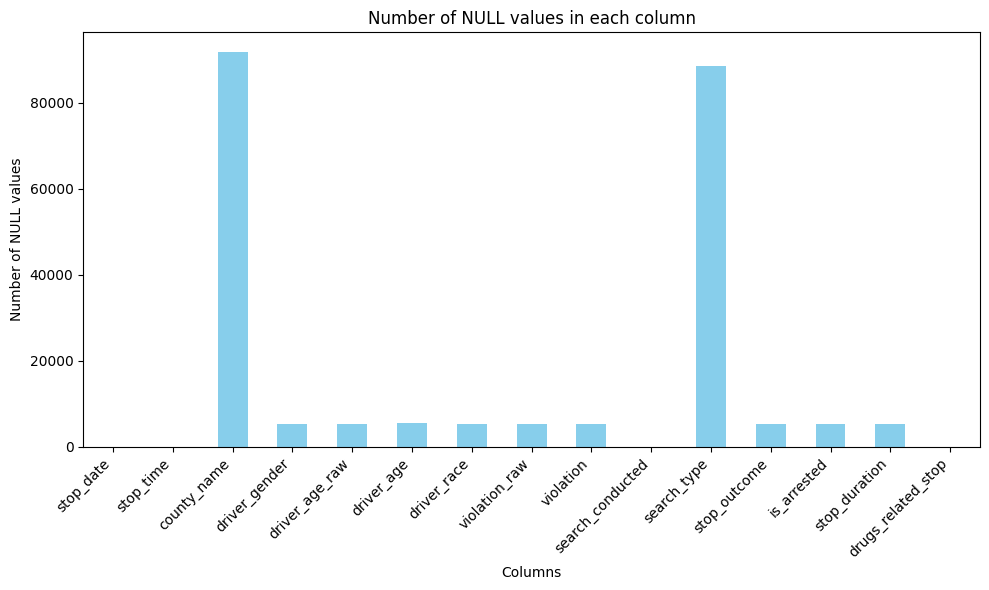

In [29]:
#Question 2

import pandas as pd
import matplotlib.pyplot as plt

# Check for NULL values in each column
null_counts = data.isnull().sum()

# Remove columns that have all NULL values
data_cleaned = data.dropna(axis=1, how='all')

# Plot the number of NULL values per column
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NULL values in each column')
plt.xlabel('Columns')
plt.ylabel('Number of NULL values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [30]:
#Question 2

data_cleaned

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [31]:
#Question 3

# Filter the data to only include rows where violation is "Speeding" and gender is not null
speeding_data = data_cleaned[data_cleaned["violation"] == "Speeding"]

# Group by driver gender and count the number of occurrences of speeding for each gender
speeding_by_gender = speeding_data["driver_gender"].value_counts()

# Display the result
speeding_by_gender


driver_gender
M    32979
F    15482
Name: count, dtype: int64

In [32]:
#Question 4

# Group by driver gender and count how often a search was conducted during a stop
search_by_gender = data_cleaned.groupby("driver_gender")["search_conducted"].value_counts(normalize=True).unstack()

# Display the result
search_by_gender


search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


In [33]:
#Question 5

# Convert stop_duration to numeric by mapping time ranges to approximate minutes
duration_mapping = {
    "0-15 Min": 7.5,
    "16-30 Min": 23,
    "30+ Min": 45
}

# Map stop_duration to numeric values
data_cleaned["stop_duration_numeric"] = data_cleaned["stop_duration"].map(duration_mapping)

# Calculate the mean stop duration
mean_stop_duration = data_cleaned["stop_duration_numeric"].mean()

# Display the result
mean_stop_duration


11.346868273036595

In [34]:
#Question 6

# Group the data by violation and calculate the distribution of driver ages for each violation
age_distribution_by_violation = data_cleaned.groupby("violation")["driver_age"].describe()

# Display the result
age_distribution_by_violation


,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


In [35]:
#Question 7

# Get the number of unique violations reported in the dataset
unique_violations_count = data_cleaned["violation"].nunique()

# Display the result
unique_violations_count


6

In [36]:
#Question 8

# Group the data by violation and gender, then count the occurrences of each violation for each gender
violations_by_gender = data_cleaned.groupby(["violation", "driver_gender"]).size().unstack()

# Display the result
violations_by_gender


driver_gender,F,M
violation,,
Equipment,2487,8533
Moving violation,3204,13020
Other,690,3627
Registration/plates,1013,2419
Seat belt,635,2317
Speeding,15482,32979


In [37]:
#Question 9

# Group the data by violation and whether a search was conducted, then count the occurrences
violations_by_search_conducted = data_cleaned.groupby(["violation", "search_conducted"]).size().unstack()

# Display the result
violations_by_search_conducted


search_conducted,False,True
violation,,
Equipment,10316,704
Moving violation,15329,895
Other,4107,210
Registration/plates,3098,334
Seat belt,2856,96
Speeding,47506,957


In [38]:
#Question 10

# Get the most common stop duration
most_common_stop_duration = data_cleaned["stop_duration"].describe()

# Display the result
most_common_stop_duration

count        86408
unique           5
top       0-15 Min
freq         69543
Name: stop_duration, dtype: object

### My questions


In [39]:
#Question 1
#Is there a relationship between the driver's age and the likelihood of a vehicle search by the police?

# Group by driver age and check search conducted rate
age_search_relation = data_cleaned.groupby("driver_age")["search_conducted"].mean()

# Display the result for age groups
age_search_relation.head()


driver_age
15.0    0.200000
16.0    0.066667
17.0    0.027350
18.0    0.037486
19.0    0.041512
Name: search_conducted, dtype: float64

In [40]:
#Question 2
#How many stops have occurred in each month of the year?

# Convert stop_date to datetime format
data_cleaned["stop_date"] = pd.to_datetime(data_cleaned["stop_date"])

# Extract the month and count occurrences
monthly_stops = data_cleaned["stop_date"].dt.month.value_counts().sort_index()

# Display the result
monthly_stops


stop_date
1     8479
2     7042
3     7742
4     7529
5     7935
6     7630
7     7568
8     7615
9     7427
10    7745
11    7877
12    7152
Name: count, dtype: int64

In [46]:
#Question 3
#On which days of the week have the most violations occurred?

# Define the correct order for the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Extract the day of the week from stop_date
data_cleaned["day_of_week"] = data_cleaned["stop_date"].dt.day_name()

# Count violations by day of the week
violations_by_day = data_cleaned["day_of_week"].value_counts()

# Reindex the result to ensure correct ordering
violations_by_day = violations_by_day.reindex(day_order)

# Display the result
violations_by_day



day_of_week
Monday       13237
Tuesday      12929
Wednesday    12549
Thursday     12456
Friday       13164
Saturday     14204
Sunday       13202
Name: count, dtype: int64

In [51]:
#Question 4
#Are younger drivers more likely to be subjected to a vehicle search?

# Define an age group for younger drivers (e.g., age < 25)
younger_drivers = data_cleaned[data_cleaned["driver_age"] < 25]
older_drivers = data_cleaned[data_cleaned["driver_age"] >= 25]

# Calculate the proportion of searches conducted for younger drivers
younger_search_proportion = younger_drivers["search_conducted"].mean()
older_search_proportion = older_drivers["search_conducted"].mean()

# Display the result
print("younger_search_proportion =",younger_search_proportion)
print("older_search_proportion =",older_search_proportion)

younger_search_proportion = 0.04473902236951118
older_search_proportion = 0.03388017705230941


In [52]:
#Question 5
#Does the driver's race have an impact on the type of violation?

# Group by race and violation to get counts of violations for each race
violation_by_race = data_cleaned.groupby(["driver_race", "violation"]).size().unstack()

# Display the result
violation_by_race


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_race,,,,,,
Asian,201,334,82,58,58,1526
Black,2202,2883,887,784,450,5038
Hispanic,2146,2408,593,716,551,3093
Other,16,52,21,2,2,147
White,6455,10547,2734,1872,1891,38659


In [54]:
#Question 6
#During which time of day (morning, afternoon, night) have the most searches been conducted?

# Extract hour from stop_time and categorize into time periods
data_cleaned["hour"] = pd.to_datetime(data_cleaned["stop_time"], format='%H:%M').dt.hour
data_cleaned["time_of_day"] = pd.cut(data_cleaned["hour"], bins=[0, 12, 18, 24], labels=["Morning", "Afternoon", "Night"], right=False)

# Group by time_of_day and calculate the number of searches conducted
searches_by_time_of_day = data_cleaned.groupby("time_of_day", observed=False)["search_conducted"].sum()

# Display the result
searches_by_time_of_day




time_of_day
Morning      1581
Afternoon     770
Night         845
Name: search_conducted, dtype: int64

In [56]:
#Question 7
#Are older drivers (over 60 years old) more likely to commit certain types of violations?

# Filter data for drivers older than 60
older_drivers = data_cleaned[data_cleaned["driver_age"] > 60]

# Count violations committed by older drivers
violations_by_older_drivers = older_drivers["violation"].value_counts()

# Display the result
violations_by_older_drivers


violation
Speeding               1760
Moving violation        748
Other                   245
Equipment               206
Seat belt                57
Registration/plates      42
Name: count, dtype: int64

In [57]:
#Question 8
#Which violations are most likely to result in an arrest?

# Group by violation and calculate the proportion of arrests
arrest_by_violation = data_cleaned.groupby("violation")["is_arrested"].mean()

# Display the result
arrest_by_violation


violation
Equipment              0.057623
Moving violation        0.05609
Other                  0.078527
Registration/plates    0.097319
Seat belt              0.025068
Speeding               0.013144
Name: is_arrested, dtype: object

In [58]:
#Question 9
#Is there a relationship between the stop duration and the likelihood of a vehicle search?

# Group by stop_duration and calculate the proportion of searches conducted
search_by_stop_duration = data_cleaned.groupby("stop_duration")["search_conducted"].mean()

# Display the result
search_by_stop_duration


stop_duration
0-15 Min     0.013704
1            0.000000
16-30 Min    0.099890
2            0.000000
30+ Min      0.272924
Name: search_conducted, dtype: float64

In [63]:
#Question 10
#On which day of the week did the most vehicle stops occur?

# Assuming stop_date is in a format that can be converted to datetime
data_cleaned["stop_date"] = pd.to_datetime(data_cleaned["stop_date"])
data_cleaned["day_of_week"] = data_cleaned["stop_date"].dt.day_name()
most_common_day = data_cleaned["day_of_week"].value_counts().idxmax()
most_common_day

'Saturday'